In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()+'/dataset'
files = os.listdir(path)
files

['Iris.csv', 'wdbc.names', 'wdbc.data', 'breast-cancer-wisconsin.data']

In [3]:
os.chdir(path)

#### Loading the data

In [9]:
iris_data = pd.read_csv('Iris.csv',index_col='Id')

In [10]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [11]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Glimpse of the data

In [12]:
import seaborn as sns

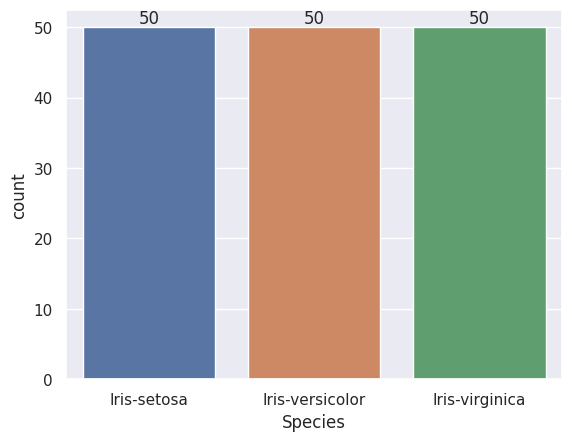

In [15]:
ax = sns.countplot(x="Species",data=iris_data)
for i in ax.containers:
    ax.bar_label(i,)

#### Removing the label

In [18]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [19]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [20]:
iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2
150,5.9,3.0,5.1,1.8,2


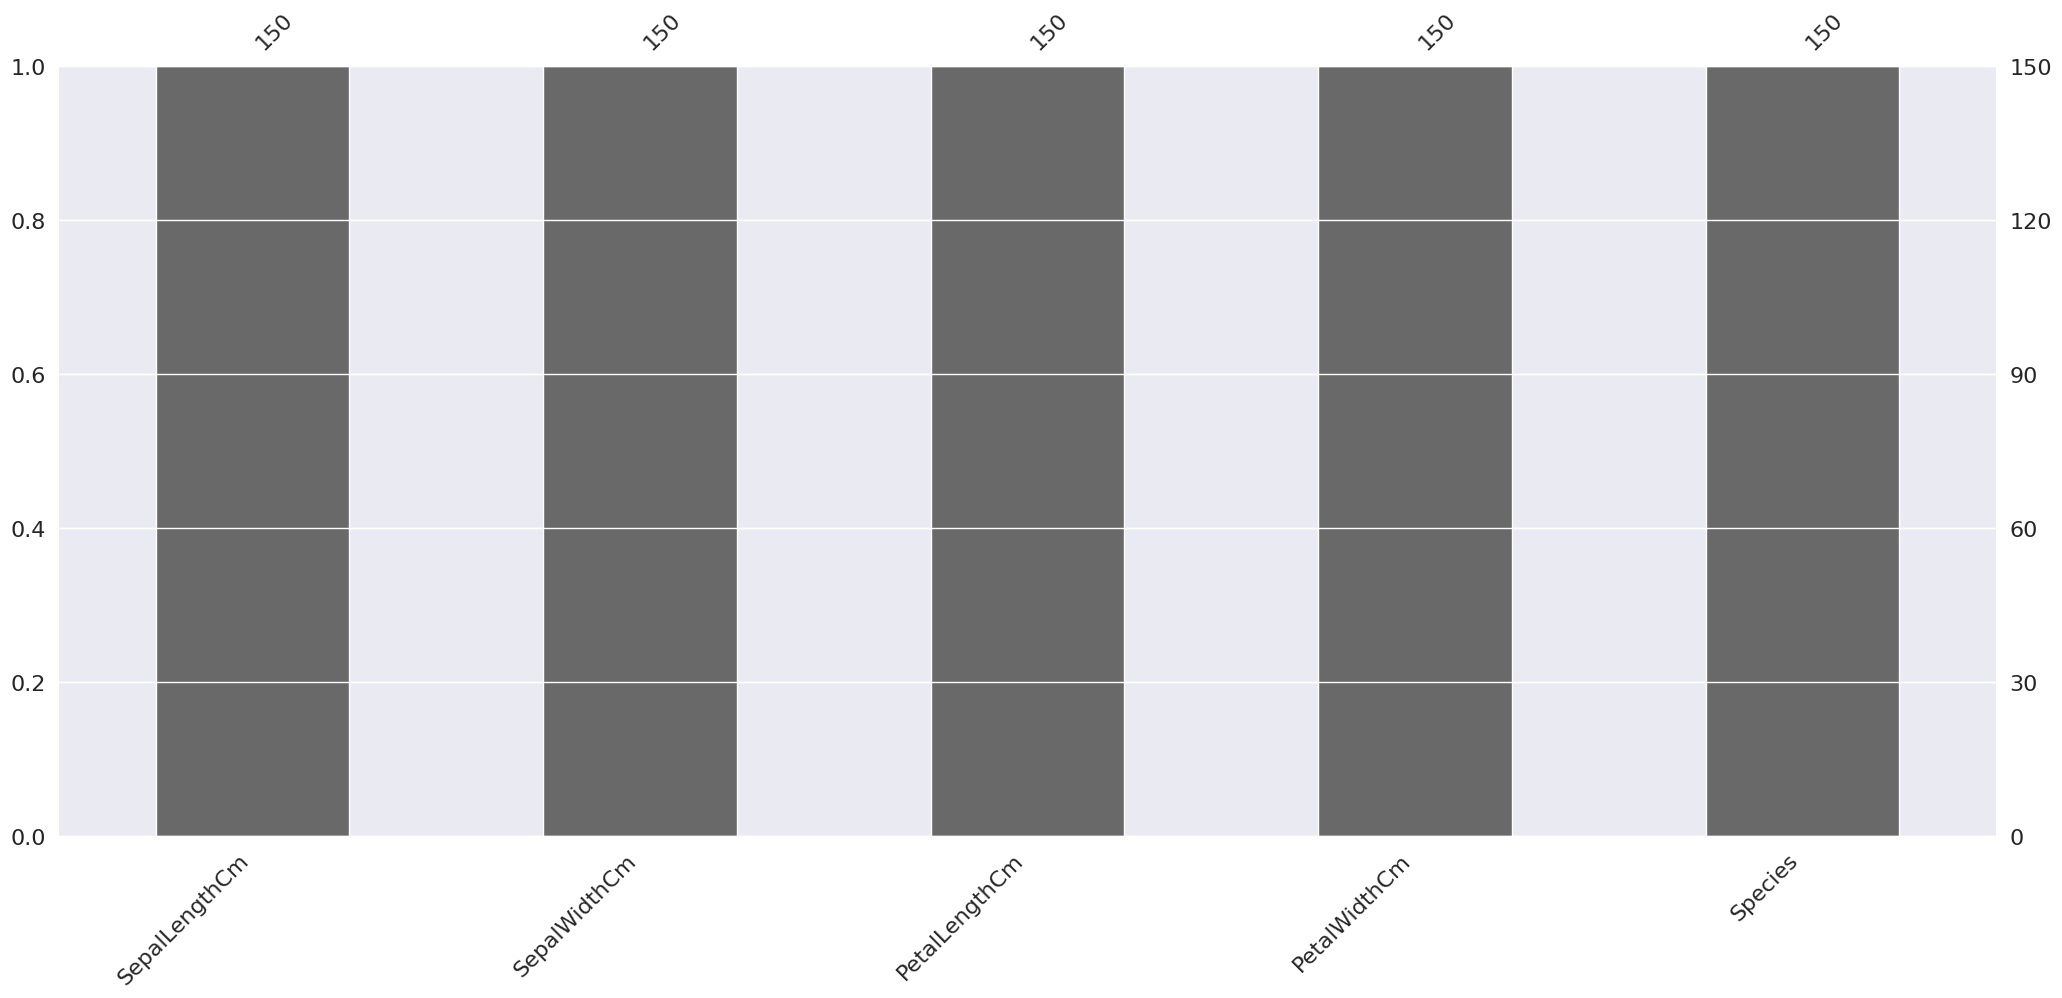

In [22]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(iris_data)

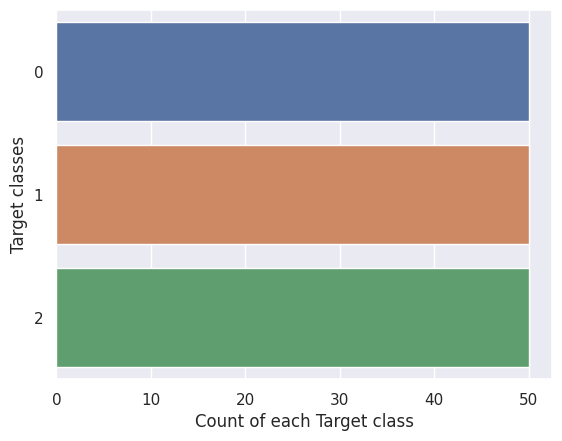

In [23]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

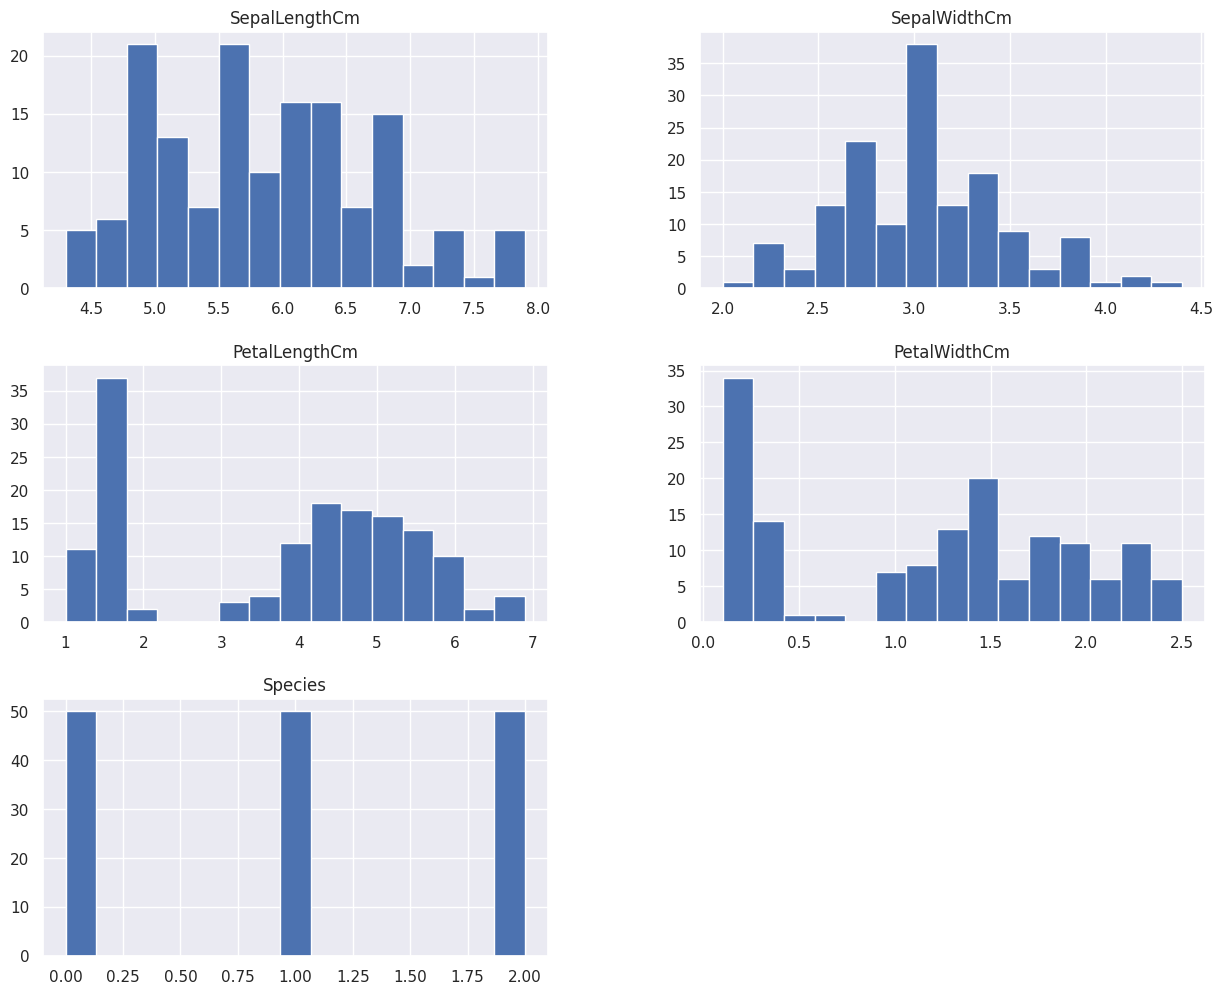

In [24]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### Covariance Matrix

In [61]:
cov_data = np.corrcoef(iris_data.T)
cov_data

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363,  0.78256123],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409, -0.4194462 ],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ,  0.94904254],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ,  0.95646382],
       [ 0.78256123, -0.4194462 ,  0.94904254,  0.95646382,  1.        ]])

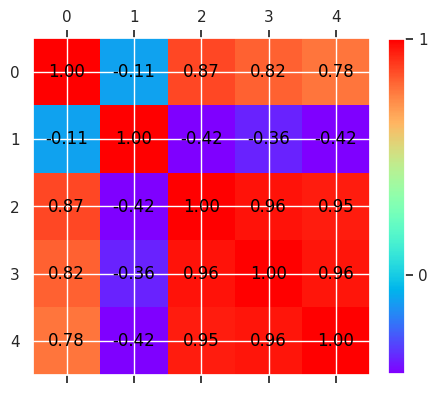

In [59]:
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

### Computing the Principal Component Scores

In [26]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [28]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [29]:
pd.DataFrame(pca.get_covariance())

,0,1,2,3
0,0.685694,-0.039268,1.273682,0.516904
1,-0.039268,0.188004,-0.321713,-0.117981
2,1.273682,-0.321713,3.113179,1.296387
3,0.516904,-0.117981,1.296387,0.582414


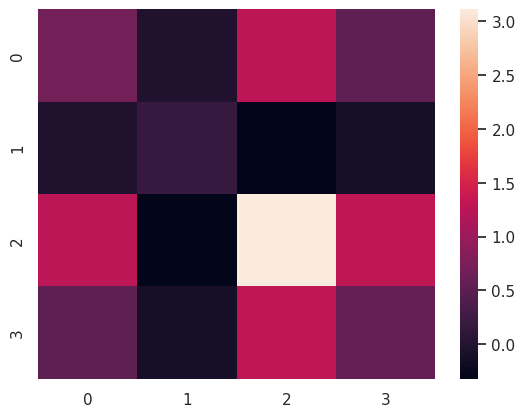

In [49]:
#covar_map = sns.load_dataset(pd.DataFrame(pca.get_covariance())).pivot(iris_data.columns)
ax = sns.heatmap(pca.get_covariance())

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

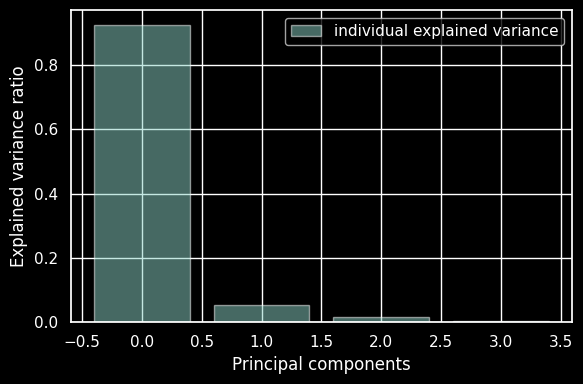

In [51]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [62]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [33]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [39]:
import scipy

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
#mode, _ = scipy.stats.mode(y_train[X_train_new, k], axis=1)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


/home/sandeepchatterjee/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/sandeepchatterjee/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/home/sandeepchatterjee/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precede

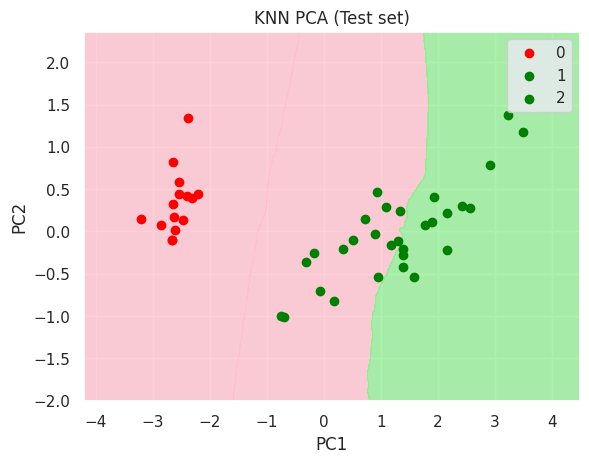

In [42]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [52]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [53]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
#mode, _ = scipy.stats.mode(y_train[X_train_new, k], axis=1)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


/home/sandeepchatterjee/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/sandeepchatterjee/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 